In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification" 

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape 

(70000,)

In [15]:
28*28

784

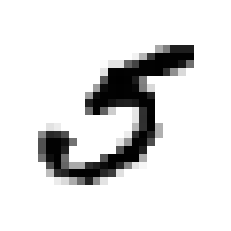

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [9]:
y[36000]

5

In [15]:
y[0]

0

In [10]:
y[36000]

5

In [11]:
y = y.astype(np.uint8)


In [12]:
# splitting the data into training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
# Training a binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==  5)

    

In [14]:
# using a classifier and training it. using the stochastic gradient descent classifier
# training the classifier on the whole training set

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
digit = X[0]
sgd_clf.predict([digit])

array([False])

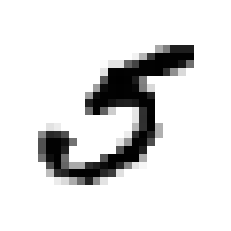

In [73]:
three_digit = X[20000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [18]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test ==  3)

In [19]:
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([three_digit])

array([ True])

In [21]:
# time to evaluate our classifier perfomance
# measuring accuracy using cross validation
# using the cross_val_score function to evaluate the classifier using k-fold classification with three folds
# k-fold classification means splitting the training set into k-folds

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.89345, 0.75235, 0.7899 ])

In [22]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8217 , 0.88795, 0.8474 ])

In [23]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.89345, 0.75235, 0.7899 ])

In [24]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.8217 , 0.88795, 0.8474 ])

In [25]:
# damn the sgdclassifier does not seem to have a good accuracy score. it has of atleast 13%
# lets look at another classifier

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [26]:
nvr_5_clf = Never5Classifier()
nvr_5_clf.fit(X_train, y_train_5)

In [27]:
nvr_5_clf.predict([X[36000]])

array([[False]])

In [28]:
nvr_5_clf.predict([X[0]])

array([[False]])

In [29]:
nvr_5_clf.fit(X_train, y_train_3)

In [30]:
nvr_5_clf.predict([three_digit])

array([[False]])

In [31]:
cross_val_score(nvr_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([1.     , 0.72895, 1.     ])

In [32]:
cross_val_score(nvr_5_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.93115, 0.7623 , 1.     ])

In [33]:
# the above results dont seem to be good. seems accuracy is not a good perfomance measure for classifiers
# lets look at a much more better way using confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[44363, 10216],
       [ 1070,  4351]], dtype=int64)

In [35]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [36]:
# prcision and recall. computing classifier metrics
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.298688817189538

In [37]:
recall_score(y_train_5, y_train_pred)

0.8026194429072127

In [38]:
# lets compute the f1 score which is the harmonic mean of precision and recall 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.43536121673003797

In [39]:
# from the above outputs it seems like we are having a precision/recall tradeoff whereby we have a high recall and a low precision
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-2089.3230169])

In [40]:
threshold=0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [41]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [42]:
# raising the threshold decreases the recall. choosing which threshold to use

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [48]:
# computing precision and recall for all possible threshold using the precision_recall_curve() fun

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

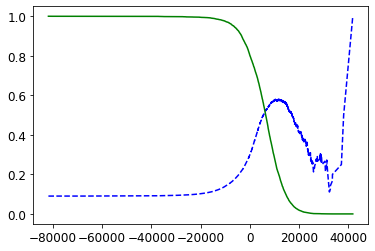

In [49]:
# plotting precision and recall as functions as functions using matplotlib
def plot_precision_recall_vs_threshold(precision, recalls, thresholds ):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...]
    # highlight the threshold, add the legend, axis label and grid
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [50]:
# looking for the lowest threshold that will give us 90% precision

threshold_90_precision = threshold[np.argmax(precisions >= 0.90)] 

In [51]:
y_train_pred_90 = (y_scores >= threshold_90_precision )

In [52]:
# checking the predictions' precision and recall
precision_score(y_train_5, y_train_pred_90)

1.0

In [53]:
recall_score(y_train_5, y_train_pred_90)

0.00018446781036709093

In [56]:
precision_score(y_train_5, y_train_pred_90)

1.0

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.00018446781036709093

In [58]:
# still seems our classifier does not work well. it has a precision of 1.0 whereas the rcall is at 0.0 
# The ROC curve (receiver operating characteristic)
# to compute the roc curve we first need to compute the TPR and FPR for various threshold values using the roc curve fun

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

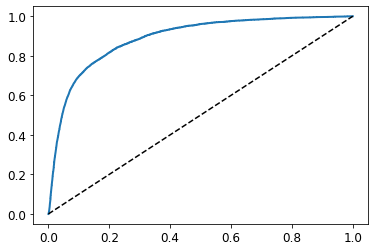

In [59]:
# plotting the FPR against the TPR using matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    [...]
plot_roc_curve(fpr, tpr)
plt.show()

In [63]:
# comparing classifiers using by measuring the area under the cave
# a perfect classifier will have have a ROC AUC equal to 1
# using scikit learn function to compute the ROC AUC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.8873322501447319

In [64]:
# lets train a randomforest classifier and compare its ROC curve and ROC AUC score to the sgdc
# the rfclf return an array containing a row per instance and a column per instance 

from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [65]:
# we need scores to plot the ROC curve and not probability 
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

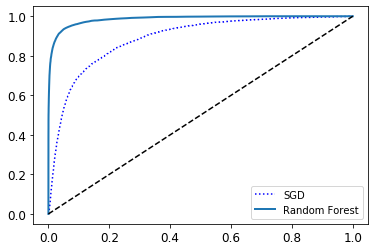

In [66]:
# plotting the Roc curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()



In [67]:
# from the above output the rfclf ROC curve looks much better than the sdgclf
roc_auc_score(y_train_5, y_scores_forest)

0.9859689313269965

In [68]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [69]:
precision_score(y_train_5, y_train_pred)

0.7967806841046278

In [70]:
recall_score(y_train_5, y_train_pred)

0.8765910348644161

In [71]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
forest_clf.predict([some_digit])

array([ True])

In [74]:
forest_clf.fit(X_train, y_train_3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [75]:
forest_clf.predict([three_digit])

array([ True])

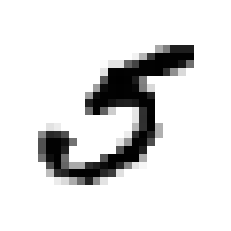

In [84]:
digit = X[594]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


In [85]:
# multiclass classification

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([digit])

array([0], dtype=uint8)

In [86]:

sgd_clf.predict([three_digit])

array([3], dtype=uint8)

In [87]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [89]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [90]:
forest_clf.predict([three_digit])

array([3], dtype=uint8)

In [91]:
forest_clf.predict([digit])

array([0], dtype=uint8)

In [92]:
forest_clf.predict([X[300]])

array([0], dtype=uint8)

In [93]:
forest_clf.predict([X[4000]])

array([0], dtype=uint8)

In [94]:
# from the above output from the two classifiers.the classifiers did well. 
# the output was correct. but what behind each classifier is that scikit learn
# trained 10 binary classifiers got their decision scores for the image and selected the class with the highest scores
# lets see this in action by using the decision function method under the sgd_clf class
# it will return 10 scores, one per class
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores


array([[  -382.52170284, -19072.60630422,  -9215.51671077,
         -3736.60589967, -16120.01135804,    274.63843662,
        -18156.66165997,  -7056.62587109, -10653.83889191,
        -10196.1448461 ]])

In [95]:
# the highest score is the one corresponding to class 5
np.argmax(some_digit_scores)

5

In [96]:
np.argmin(some_digit_scores)

1

In [97]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [98]:
sgd_clf.classes_[5]

5

In [ ]:
# using onevsoneclassifier

from sklearn.multiclass import 